<a href="https://colab.research.google.com/github/vasamsettiTejasree/Digits-automated-speech-recognition-b4/blob/main/Digits_Automated_Speech_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import spacy


In [ ]:
# Load the SpaCy model (assuming you're working with English text)
nlp = spacy.load("en_core_web_sm")


In [ ]:
# Step 1: Load Dataset
def load_dataset(data_path):
    """
    Load audio files and extract MFCC features and corresponding labels.
    """
    X, y = [], []
    files = os.listdir(data_path)
    for file in files:
        if file.endswith('.wav'):
            file_path = os.path.join(data_path, file)
            audio, sr = librosa.load(file_path, sr=None)
            mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
            mfcc = np.mean(mfcc.T, axis=0)
            X.append(mfcc)
            label = int(file.split('_')[0])  # Extract digit from filename
            y.append(label)
    return np.array(X), np.array(y), files

data_path = "/content/drive/MyDrive/free-spoken-digit-dataset-master/recordings"
X, y, file_names = load_dataset(data_path)



# Normalize Features
X = (X - np.mean(X)) / np.std(X)
y = to_categorical(y, num_classes=10)

# Split Data
X_train, X_test, y_train, y_test, train_files, test_files = train_test_split(X, y, file_names, test_size=0.2, random_state=42)

# Reshape for CNN Input
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]


Algorithm Used: Convolutional Neural Network (CNN) with MFCC Features and SpaCy Text Processing



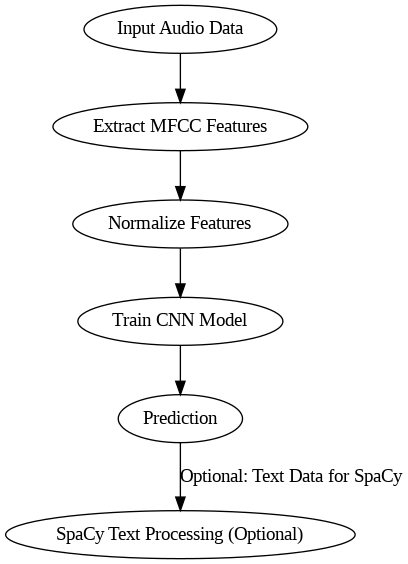

In [ ]:
algorithm = "Convolutional Neural Network (CNN) with MFCC Features and SpaCy Text Processing"

print(f"Algorithm Used: {algorithm}\n")

from graphviz import Digraph

# Initialize Digraph
workflow = Digraph(comment="Speech Digit Recognition Workflow with SpaCy", format='png')

# Add nodes for each step
workflow.node("A", "Input Audio Data")
workflow.node("B", "Extract MFCC Features")
workflow.node("C", "Normalize Features")
workflow.node("D", "Train CNN Model")
workflow.node("E", "Prediction")
workflow.node("F", "SpaCy Text Processing (Optional)")  # Added NLP step

# Add edges to define the flow
workflow.edges([("A", "B"), ("B", "C"), ("C", "D"), ("D", "E")])

# Optionally, you could connect the text processing (SpaCy) step to the model prediction if required
workflow.edge("E", "F", label="Optional: Text Data for SpaCy")  # Optional edge showing how SpaCy could be integrated

# Render the Graph
workflow.render("speech_digit_workflow_spacy", view=True)

# Visualize in Notebook
from IPython.display import Image
Image(filename="speech_digit_workflow_spacy.png")


In [ ]:
# Step 2: Build and Train Model
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(13, 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Use EarlyStopping and ModelCheckpoint callbacks to prevent overfitting and save the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', save_best_only=True)

# Training with callbacks
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

# Save Model
model.save("speech_digit_recognition_model.h5")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.2504 - loss: 2.2104 - val_accuracy: 0.5398 - val_loss: 1.5316
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4564 - loss: 1.4405 - val_accuracy: 0.6193 - val_loss: 1.1922
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5302 - loss: 1.1639 - val_accuracy: 0.6591 - val_loss: 0.9959
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6068 - loss: 1.0044 - val_accuracy: 0.7216 - val_loss: 0.8694
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6557 - loss: 0.8862 - val_accuracy: 0.7500 - val_loss: 0.7609
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6979 - loss: 0.7698 - val_accuracy: 0.7330 - val_loss: 0.7164
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7449 - loss: 0.6964 - val_accuracy: 0.7727 - val_loss: 0.6215
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7377 - loss: 0.6565 - val_accuracy: 0.7955 - val_loss: 0.5854
Ep

In [ ]:
# Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")



Test Accuracy: 90.00%



--- Visualizing Predictions ---

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
File: 1_george_6.wav | Predicted Digit: 1 | Confidence: 100.00%


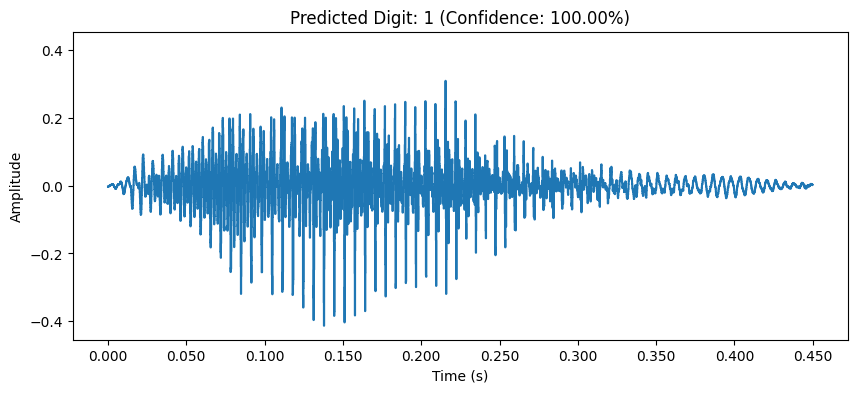

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
File: 2_theo_35.wav | Predicted Digit: 2 | Confidence: 100.00%


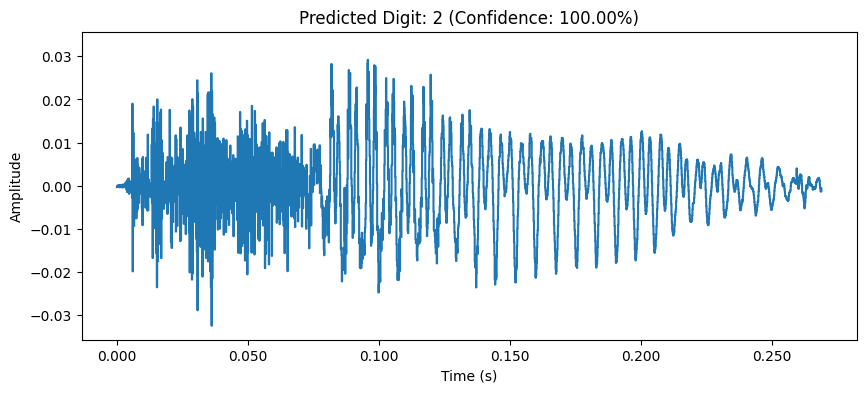

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
File: 0_yweweler_46.wav | Predicted Digit: 2 | Confidence: 100.00%


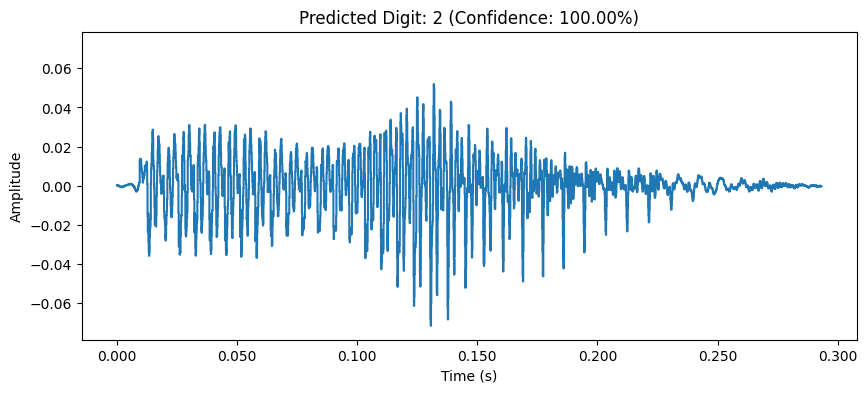

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
File: 1_jackson_14.wav | Predicted Digit: 2 | Confidence: 100.00%


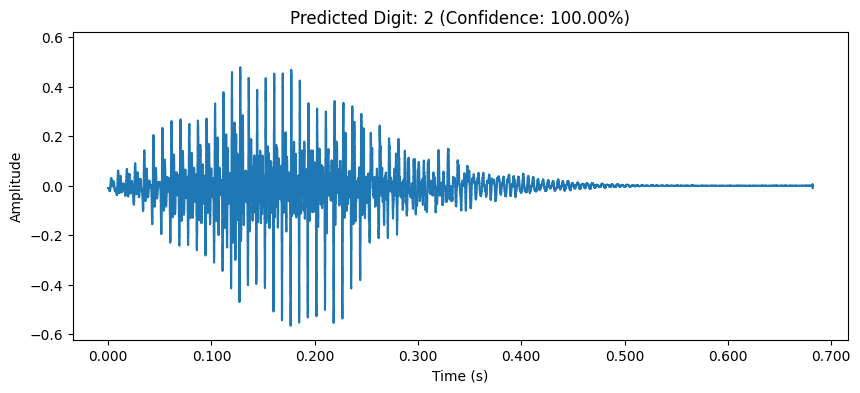

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
File: 3_jackson_12.wav | Predicted Digit: 3 | Confidence: 100.00%


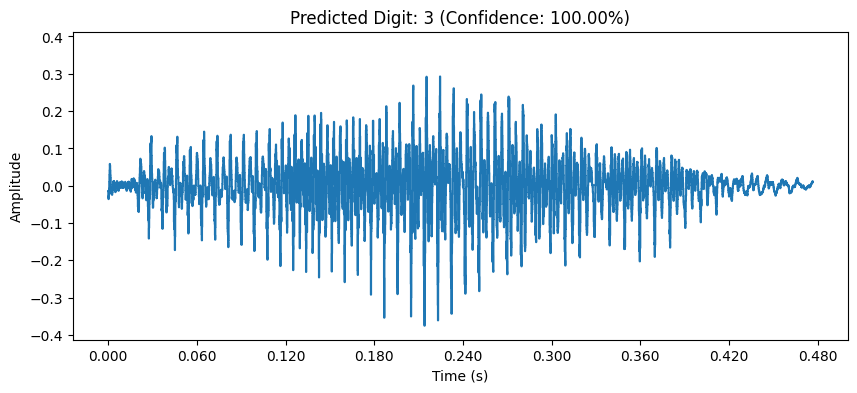

In [ ]:
# Step 3: Visualize Predictions and Waveforms
def visualize_predictions(data_path, model, files, test_files):
    """
    Visualize audio waveforms, the predicted digits, and confidence scores.
    """
    print("\n--- Visualizing Predictions ---\n")
    for file_name in test_files[:5]:  # Visualize the first 5 test samples
        file_path = os.path.join(data_path, file_name)

        # Load audio and extract features
        audio, sr = librosa.load(file_path, sr=None)
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
        mfcc = np.mean(mfcc.T, axis=0).reshape(1, 13, 1)

        # Predict digit
        prediction = model.predict(mfcc)
        predicted_digit = np.argmax(prediction)
        confidence = np.max(prediction) * 100

        # Display prediction details
        print(f"File: {file_name} | Predicted Digit: {predicted_digit} | Confidence: {confidence:.2f}%")

        # Plot waveform
        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(audio, sr=sr)
        plt.title(f"Predicted Digit: {predicted_digit} (Confidence: {confidence:.2f}%)")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.show()

# Load the best model (saved during training)
model = load_model("best_model.keras")

# Visualize Predictions
visualize_predictions(data_path, model, file_names, test_files)


In [ ]:
# Step 4: Display Evaluation Metrics (Optional)
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

# Classification report
print("\n--- Classification Report ---")
print(classification_report(np.argmax(y_test, axis=1), y_pred_class))

# Confusion matrix
print("\n--- Confusion Matrix ---")
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred_class))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.92      0.84      0.88        64
           1       0.95      0.98      0.97        57
           2       0.93      0.88      0.90        57
           3       0.79      0.90      0.84        42

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220


--- Confusion Matrix ---
[[54  3  1  6]
 [ 1 56  0  0]
 [ 3  0 50  4]
 [ 1  0  3 38]]
